In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%reload_ext autoreload

In [70]:
import json
import numpy as np
import pandas as pd
import random

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    plot_confusion_matrix,
)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from weight_lifting import WeightLifting
from sfs_features import (
    get_lr_features,
    get_svm_features,
    get_mpl_features
)

from sklearn.ensemble import IsolationForest

In [71]:
np.random.seed(42)
random.seed(42)

### BASE PADRAO

In [72]:
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test, state="INICIAL")

Model: LR
            Valor
Accuracy   0.9821
F1         0.9673
Precision  0.9633
Recall     0.9719

[[322   3   0   0   0]
 [  6 209   3   0   0]
 [  0   1  25   0   0]
 [  0   0   0  62   3]
 [  0   0   0   2 370]]

              precision    recall  f1-score      support
A              0.981707  0.990769  0.986217   325.000000
B              0.981221  0.958716  0.969838   218.000000
C              0.892857  0.961538  0.925926    26.000000
D              0.968750  0.953846  0.961240    65.000000
E              0.991957  0.994624  0.993289   372.000000
accuracy       0.982107  0.982107  0.982107     0.982107
macro avg      0.963298  0.971899  0.967302  1006.000000
weighted avg   0.982259  0.982107  0.982111  1006.000000



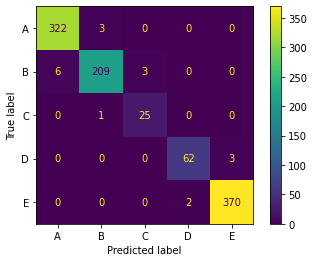

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.6988
F1         0.6210
Precision  0.8550
Recall     0.5580

[[204  10   1   0 110]
 [ 14  98   0   0 106]
 [  0   1  11   0  14]
 [  0   0   0  19  46]
 [  0   0   0   1 371]]

              precision    recall  f1-score      support
A              0.935780  0.627692  0.751381   325.000000
B              0.899083  0.449541  0.599388   218.000000
C              0.916667  0.423077  0.578947    26.000000
D              0.950000  0.292308  0.447059    65.000000
E              0.573416  0.997312  0.728165   372.000000
accuracy       0.698807  0.698807  0.698807     0.698807
macro avg      0.854989  0.557986  0.620988  1006.000000
weighted avg   0.794257  0.698807  0.685740  1006.000000



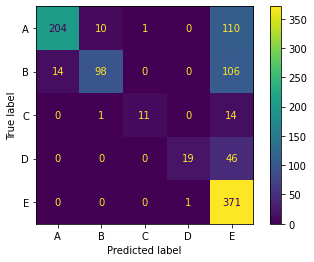

--------------------------------------------
Model: MPL
            Valor
Accuracy   0.3231
F1         0.0977
Precision  0.0646
Recall     0.2000

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score      support
A              0.323062  1.000000  0.488355   325.000000
B              0.000000  0.000000  0.000000   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.000000  0.000000  0.000000   372.000000
accuracy       0.323062  0.323062  0.323062     0.323062
macro avg      0.064612  0.200000  0.097671  1006.000000
weighted avg   0.104369  0.323062  0.157769  1006.000000



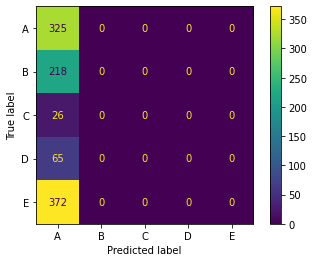

--------------------------------------------


In [84]:
engine.plot_results(base_padrao_predict, X_test, y_test)

### FEATURE SELECTION WITH SequentialFeatureSelector 

In [74]:
sfs_predict = []

# LOGISTIC REGRESSION
lr_X_train, lr_X_test, lr_y_train, lr_y_test = engine.create_train_test(df, features=get_mpl_features())
lr_predict = engine.fit_and_predict(lr_X_train, lr_X_test, lr_y_train, lr_y_test, state="SFS")
lr_predict = lr_predict[0:1][0] # Somente o LR interessa
#lr_predict.update({'X_TEST':lr_X_test})
sfs_predict.append(lr_predict)

# SUPORT VECTOR MACHINES
svm_X_train, svm_X_test, svm_y_train, svm_y_test = engine.create_train_test(df, features=get_svm_features())
svm_predict = engine.fit_and_predict(svm_X_train, svm_X_test, svm_y_train, svm_y_test, state="SFS")
svm_predict = svm_predict[1:2][0] # Somente o SVM interessa
#lr_predict.update({'X_TEST':svm_X_test})
sfs_predict.append(svm_predict)

# MULTILAYER PERCEPTRON
mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test = engine.create_train_test(df, features=get_mpl_features())
mpl_predict = engine.fit_and_predict(mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test, state="SFS")
mpl_predict = mpl_predict[2:3][0] # Somente o mpl interessa
#lr_predict.update({'X_TEST':mlp_X_test})
sfs_predict.append(mpl_predict)

Model: LR
            Valor
Accuracy   0.7893
F1         0.5585
Precision  0.6899
Recall     0.5472

[[247   0   0   0  78]
 [ 46 172   0   0   0]
 [  0  21   5   0   0]
 [  0   0   0   0  65]
 [  2   0   0   0 370]]

              precision    recall  f1-score      support
A              0.837288  0.760000  0.796774   325.000000
B              0.891192  0.788991  0.836983   218.000000
C              1.000000  0.192308  0.322581    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.721248  0.994624  0.836158   372.000000
accuracy       0.789264  0.789264  0.789264     0.789264
macro avg      0.689945  0.547184  0.558499  1006.000000
weighted avg   0.756166  0.789264  0.756314  1006.000000



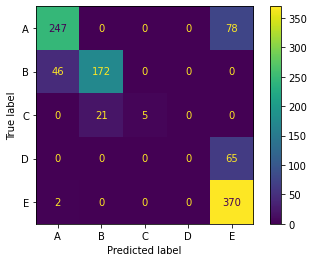

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.7356
F1         0.6465
Precision  0.7638
Recall     0.6015

[[223  30   1   0  71]
 [ 37 124   3   0  54]
 [  3   2  12   0   9]
 [  1   0   0  21  43]
 [  6   0   0   6 360]]

              precision    recall  f1-score      support
A              0.825926  0.686154  0.749580   325.000000
B              0.794872  0.568807  0.663102   218.000000
C              0.750000  0.461538  0.571429    26.000000
D              0.777778  0.323077  0.456522    65.000000
E              0.670391  0.967742  0.792079   372.000000
accuracy       0.735586  0.735586  0.735586     0.735586
macro avg      0.763793  0.601464  0.646542  1006.000000
weighted avg   0.756609  0.735586  0.723016  1006.000000



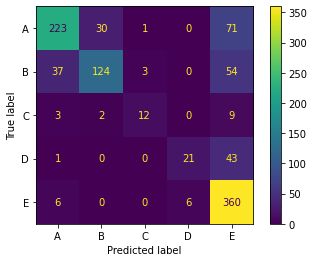

--------------------------------------------
Model: MPL
            Valor
Accuracy   0.5577
F1         0.2720
Precision  0.2871
Recall     0.3165

[[191   0   0   0 134]
 [  2   0   0   0 216]
 [  0   0   0   0  26]
 [  0   0   0   0  65]
 [  2   0   0   0 370]]

              precision    recall  f1-score      support
A              0.979487  0.587692  0.734615   325.000000
B              0.000000  0.000000  0.000000   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.456227  0.994624  0.625528   372.000000
accuracy       0.557654  0.557654  0.557654     0.557654
macro avg      0.287143  0.316463  0.272029  1006.000000
weighted avg   0.485139  0.557654  0.468635  1006.000000



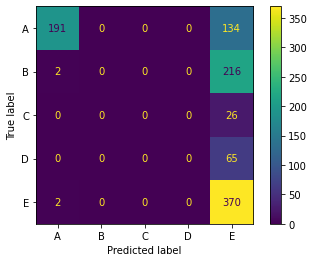

--------------------------------------------


In [85]:
engine.plot_results([sfs_predict[0]], lr_X_test, lr_y_test)
engine.plot_results([sfs_predict[1]], svm_X_test, svm_y_test)
engine.plot_results([sfs_predict[2]], mlp_X_test, mlp_y_test)

### ISOLATION FOREST

In [76]:
iso = IsolationForest(contamination=0.05)
predict = iso.fit_predict(df.iloc[:, 0:-1])

mask = predict != -1

iso_X_train, iso_X_test, iso_y_train, iso_y_test = engine.create_train_test(df.iloc[mask])

isolation_predict = engine.fit_and_predict(iso_X_train, iso_X_test, iso_y_train, iso_y_test, state="ISO")
#plot_confusion_matrix(isolation_predict[2]['model'], iso_X_test, iso_y_test, values_format = '.5g')

Model: LR
            Valor
Accuracy   0.9791
F1         0.9630
Precision  0.9693
Recall     0.9572

[[343   4   0   0   0]
 [  7 200   2   0   0]
 [  1   1  20   0   0]
 [  0   0   0  57   4]
 [  1   0   0   0 316]]

              precision    recall  f1-score     support
A              0.974432  0.988473  0.981402  347.000000
B              0.975610  0.956938  0.966184  209.000000
C              0.909091  0.909091  0.909091   22.000000
D              1.000000  0.934426  0.966102   61.000000
E              0.987500  0.996845  0.992151  317.000000
accuracy       0.979079  0.979079  0.979079    0.979079
macro avg      0.969326  0.957155  0.962986  956.000000
weighted avg   0.979150  0.979079  0.978999  956.000000



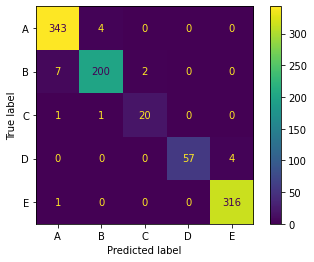

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.7207
F1         0.6365
Precision  0.8716
Recall     0.5757

[[242  11   0   0  94]
 [ 17 103   0   0  89]
 [  1   0   8   0  13]
 [  0   0   0  20  41]
 [  0   0   0   1 316]]

              precision    recall  f1-score     support
A              0.930769  0.697406  0.797364  347.000000
B              0.903509  0.492823  0.637771  209.000000
C              1.000000  0.363636  0.533333   22.000000
D              0.952381  0.327869  0.487805   61.000000
E              0.571429  0.996845  0.726437  317.000000
accuracy       0.720711  0.720711  0.720711    0.720711
macro avg      0.871618  0.575716  0.636542  956.000000
weighted avg   0.808628  0.720711  0.713127  956.000000



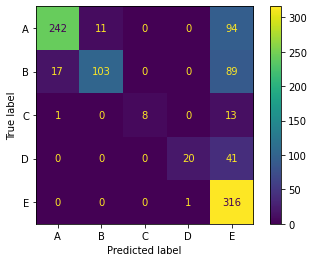

--------------------------------------------
Model: MPL
            Valor
Accuracy   0.2186
F1         0.0718
Precision  0.0437
Recall     0.2000

[[  0 347   0   0   0]
 [  0 209   0   0   0]
 [  0  22   0   0   0]
 [  0  61   0   0   0]
 [  0 317   0   0   0]]

              precision    recall  f1-score     support
A              0.000000  0.000000  0.000000  347.000000
B              0.218619  1.000000  0.358798  209.000000
C              0.000000  0.000000  0.000000   22.000000
D              0.000000  0.000000  0.000000   61.000000
E              0.000000  0.000000  0.000000  317.000000
accuracy       0.218619  0.218619  0.218619    0.218619
macro avg      0.043724  0.200000  0.071760  956.000000
weighted avg   0.047794  0.218619  0.078440  956.000000



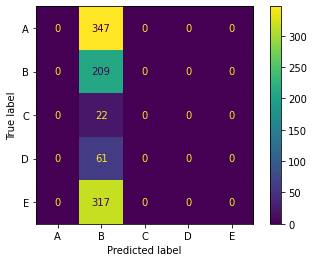

--------------------------------------------


In [86]:
engine.plot_results(isolation_predict, iso_X_test, iso_y_test)

### ISOLATION FOREST + SFS

In [78]:
iso_sfs_predict = []

# LOGISTIC REGRESSION
iso_lr_X_train, iso_lr_X_test, iso_lr_y_train, iso_lr_y_test = engine.create_train_test(df.iloc[mask], features=get_mpl_features())
iso_lr_predict = engine.fit_and_predict(iso_lr_X_train, iso_lr_X_test, iso_lr_y_train, iso_lr_y_test, state="ISO_SFS")
iso_lr_predict = iso_lr_predict[0:1][0] # Somente o LR interessa
#lr_predict.update({'X_TEST':lr_X_test})
iso_sfs_predict.append(iso_lr_predict)

# SUPORT VECTOR MACHINES
iso_svm_X_train, iso_svm_X_test, iso_svm_y_train, iso_svm_y_test = engine.create_train_test(df.iloc[mask], features=get_svm_features())
iso_svm_predict = engine.fit_and_predict(iso_svm_X_train, iso_svm_X_test, iso_svm_y_train, iso_svm_y_test, state="ISO_SFS")
iso_svm_predict = iso_svm_predict[1:2][0] # Somente o SVM interessa
#lr_predict.update({'X_TEST':svm_X_test})
iso_sfs_predict.append(iso_svm_predict)

# MULTILAYER PERCEPTRON
iso_mlp_X_train, iso_mlp_X_test, iso_mlp_y_train, iso_mlp_y_test = engine.create_train_test(df.iloc[mask], features=get_mpl_features())
iso_mlp_predict = engine.fit_and_predict(iso_mlp_X_train, iso_mlp_X_test, iso_mlp_y_train, iso_mlp_y_test, state="ISO_SFS")
iso_mlp_predict = iso_mlp_predict[2:3][0] # Somente o mpl interessa
#lr_predict.update({'X_TEST':mlp_X_test})
iso_sfs_predict.append(iso_mlp_predict)

#plot_confusion_matrix(iso_sfs_predict[0]['model'], iso_lr_X_test, iso_lr_y_test, values_format = '.5g')

Model: LR
            Valor
Accuracy   0.7845
F1         0.5626
Precision  0.7922
Recall     0.5525

[[255   0   0   0  92]
 [ 35 174   0   0   0]
 [  0  18   4   0   0]
 [  0   0   0   1  60]
 [  0   0   0   1 316]]

              precision    recall  f1-score     support
A              0.879310  0.734870  0.800628  347.000000
B              0.906250  0.832536  0.867830  209.000000
C              1.000000  0.181818  0.307692   22.000000
D              0.500000  0.016393  0.031746   61.000000
E              0.675214  0.996845  0.805096  317.000000
accuracy       0.784519  0.784519  0.784519    0.784519
macro avg      0.792155  0.552493  0.562598  956.000000
weighted avg   0.796098  0.784519  0.756397  956.000000



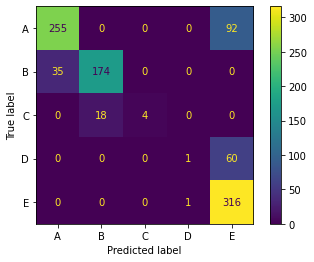

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.7479
F1         0.6565
Precision  0.7642
Recall     0.6155

[[251  36   1   0  59]
 [ 36 126   3   0  44]
 [  2   5   9   0   6]
 [  1   0   0  23  37]
 [  7   0   0   4 306]]

              precision    recall  f1-score     support
A              0.845118  0.723343  0.779503  347.000000
B              0.754491  0.602871  0.670213  209.000000
C              0.692308  0.409091  0.514286   22.000000
D              0.851852  0.377049  0.522727   61.000000
E              0.676991  0.965300  0.795839  317.000000
accuracy       0.747908  0.747908  0.747908    0.747908
macro avg      0.764152  0.615531  0.656514  956.000000
weighted avg   0.766469  0.747908  0.738539  956.000000



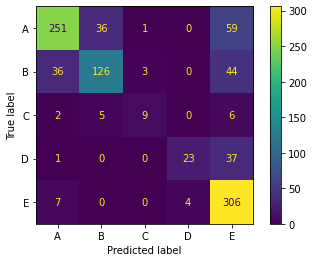

--------------------------------------------
Model: MPL
            Valor
Accuracy   0.4603
F1         0.2155
Precision  0.2699
Recall     0.2707

[[126   0   0   0 221]
 [  1   0   0   0 208]
 [  0   0   0   0  22]
 [  0   0   0   0  61]
 [  3   0   0   0 314]]

              precision    recall  f1-score     support
A              0.969231  0.363112  0.528302  347.000000
B              0.000000  0.000000  0.000000  209.000000
C              0.000000  0.000000  0.000000   22.000000
D              0.000000  0.000000  0.000000   61.000000
E              0.380145  0.990536  0.549431  317.000000
accuracy       0.460251  0.460251  0.460251    0.460251
macro avg      0.269875  0.270730  0.215547  956.000000
weighted avg   0.477855  0.460251  0.373944  956.000000



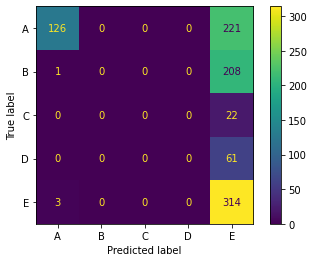

--------------------------------------------


In [87]:
engine.plot_results([iso_sfs_predict[0]], iso_lr_X_test, iso_lr_y_test)
engine.plot_results([iso_sfs_predict[1]], iso_svm_X_test, iso_svm_y_test)
engine.plot_results([iso_sfs_predict[2]], iso_mlp_X_test, iso_mlp_y_test)

In [8]:
# plot_confusion_matrix(iso_sfs_predict[2]['model'], iso_mlp_X_test, iso_mlp_y_test, values_format = '.5g')

In [9]:
# engine.plot_results([iso_sfs_predict[2]], iso_mlp_X_test, iso_mlp_y_test)

### COMPARACAO DE RESULTADOS

In [89]:
# Unificando os resultados em um unico DF
resultados_df = pd.concat([
    pd.DataFrame(base_padrao_predict),
    pd.DataFrame(sfs_predict),
    pd.DataFrame(isolation_predict),
    pd.DataFrame(iso_sfs_predict),
])

                   classificador                       tecnica  accuracy  \
0            Regressão Logística                       Inicial    0.9821   
0            Regressão Logística        Floresta de Isolamento    0.9791   
0            Regressão Logística   Sequential Feature Selector    0.7893   
0            Regressão Logística  SFS + Floresta de Isolamento    0.7845   
1  Máquina de Vetores de Suporte                       Inicial    0.6988   
1  Máquina de Vetores de Suporte        Floresta de Isolamento    0.7207   
1  Máquina de Vetores de Suporte   Sequential Feature Selector    0.7356   
1  Máquina de Vetores de Suporte  SFS + Floresta de Isolamento    0.7479   
2        Perceptron Multicamadas                       Inicial    0.3231   
2        Perceptron Multicamadas        Floresta de Isolamento    0.2186   
2        Perceptron Multicamadas   Sequential Feature Selector    0.5577   
2        Perceptron Multicamadas  SFS + Floresta de Isolamento    0.4603   

       f1  

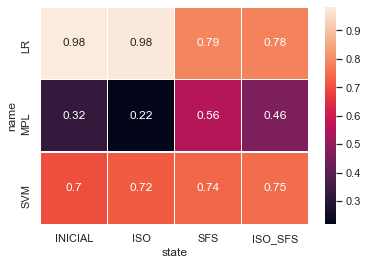

In [146]:
engine.plot_final_results(resultados_df)